In [7]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
import pandas as pd
# Load csv file as pandas dataframe
load_df = pd.read_csv('rating_and_count.csv')

# Drop all rows with NaN values
load_df.dropna(inplace=True)

# Display the modified DataFrame
display(load_df)


,index,Address,place_id,Amenities,"post_box,_counts","recycling,_counts","fast_food,_counts","restaurant,_counts","parking,_counts","pharmacy,_counts",...,'NoneType'_counts,object_counts,has_counts,no_counts,attribute_counts,'latitude'_counts,"nursing_home,_counts",total_counts,rating,review_rating
0,0,"Julianaplein 1, Amsterdam",ChIJCwHQg38JxkcRJeVtM9mPCnM,"post_box, recycling, fast_food, restaurant, pa...",4,17,4,8,10,1,...,0,0,0,1,0,0,0,215,3.2,1.0
1,1,"Julianaplein 1, Amsterdam",ChIJCwHQg38JxkcRJeVtM9mPCnM,"post_box, recycling, fast_food, restaurant, pa...",4,17,4,8,10,1,...,0,0,0,1,0,0,0,215,3.2,2.0
2,2,"Julianaplein 1, Amsterdam",ChIJCwHQg38JxkcRJeVtM9mPCnM,"post_box, recycling, fast_food, restaurant, pa...",4,17,4,8,10,1,...,0,0,0,1,0,0,0,215,3.2,5.0
3,3,"Julianaplein 1, Amsterdam",ChIJCwHQg38JxkcRJeVtM9mPCnM,"post_box, recycling, fast_food, restaurant, pa...",4,17,4,8,10,1,...,0,0,0,1,0,0,0,215,3.2,1.0
4,4,"Julianaplein 1, Amsterdam",ChIJCwHQg38JxkcRJeVtM9mPCnM,"post_box, recycling, fast_food, restaurant, pa...",4,17,4,8,10,1,...,0,0,0,1,0,0,0,215,3.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3839,3839,"Busplein 16, 1315 KR Almere",ChIJGU-a6R8XxkcR5cxWLxQYpgs,"parking, post_box, fast_food, fast_food, fast_...",1,0,20,15,3,1,...,0,0,0,1,0,0,0,149,4.0,4.0
3840,3840,"Busplein 16, 1315 KR Almere",ChIJGU-a6R8XxkcR5cxWLxQYpgs,"parking, post_box, fast_food, fast_food, fast_...",1,0,20,15,3,1,...,0,0,0,1,0,0,0,149,4.0,5.0
3841,3841,"Busplein 16, 1315 KR Almere",ChIJGU-a6R8XxkcR5cxWLxQYpgs,"parking, post_box, fast_food, fast_food, fast_...",1,0,20,15,3,1,...,0,0,0,1,0,0,0,149,4.0,5.0
3842,3842,"Busplein 16, 1315 KR Almere",ChIJGU-a6R8XxkcR5cxWLxQYpgs,"parking, post_box, fast_food, fast_food, fast_...",1,0,20,15,3,1,...,0,0,0,1,0,0,0,149,4.0,4.0


In [9]:
# Import data
features_to_exclude = ['index', 'Address', 'place_id', 'Amenities', 'rating', 'review_rating', 'total_counts']
features = [feature for feature in load_df.columns if feature not in features_to_exclude]
X = load_df[features].values
y = load_df['review_rating'].values

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()


ValueError: X has 1 features, but DecisionTreeRegressor is expecting 126 features as input.

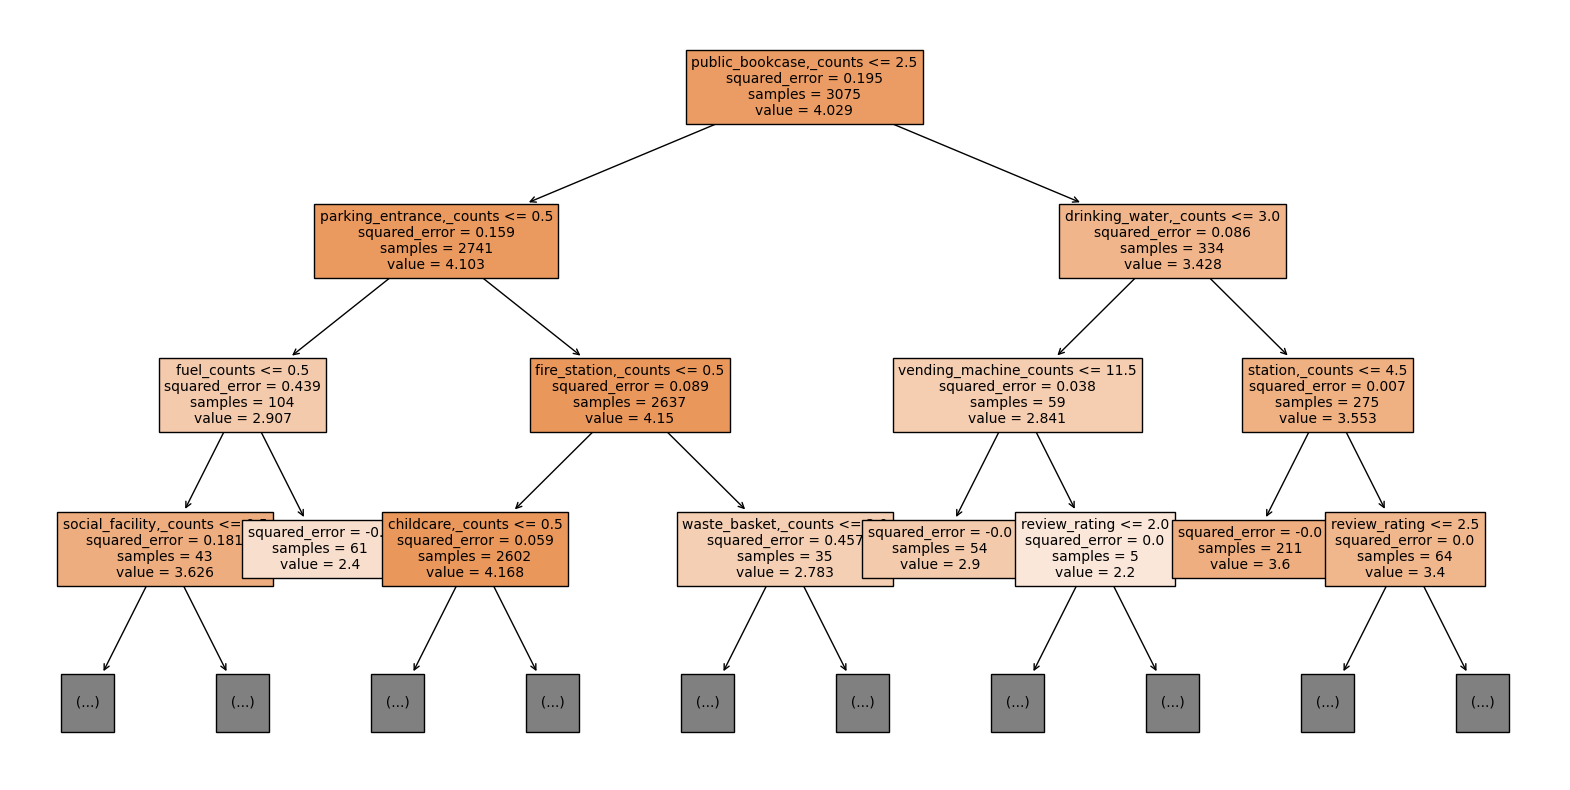

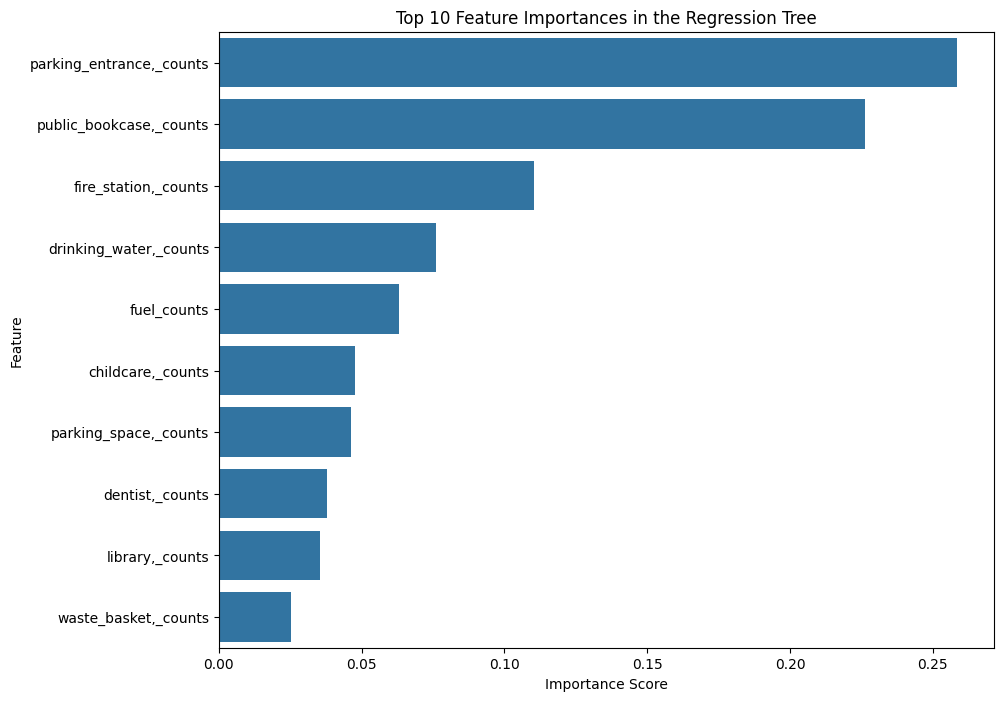

                      Feature  Average Impact on Rating
17     drinking_water,_counts                 -0.601951
86            library,_counts                 -0.031599
20   parking_entrance,_counts                  0.029519
28     vending_machine_counts                 -0.022367
25       waste_basket,_counts                 -0.020806
27    public_bookcase,_counts                  0.016385
113               fuel_counts                  0.014564
72                cafe_counts                 -0.011704
76          childcare,_counts                  0.011573
44            dentist,_counts                  0.008843
Average Cross-Validation Score (Mean Squared Error): -2.9268292682926884e-05
Standard Deviation of Cross-Validation Score: 5.853658536585377e-05


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
import numpy as np

# Load the data
file_path = ("rating_and_count.csv")
rating_and_count_df = pd.read_csv(file_path)

# Preparing the data
numeric_columns = rating_and_count_df.select_dtypes(include=['number']).columns
data = rating_and_count_df[numeric_columns]

# Remove 'index' column if it exists
if 'index' in data.columns:
    data = data.drop('index', axis=1)

X = data.drop('rating', axis=1).fillna(data.mean())  # Features, handling NaNs
y = data['rating']  # Target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using grid search
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# Creating and training the regression tree model with best parameters
reg_tree = DecisionTreeRegressor(random_state=42, **best_params)
reg_tree.fit(X_train, y_train)

# Visualizing the tree
plt.figure(figsize=(20,10))
plot_tree(reg_tree, feature_names=X.columns, filled=True, max_depth=3, fontsize=10)
plt.show()

# Extracting feature importances
feature_importances = reg_tree.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Feature Importances in the Regression Tree')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Initialize an empty list to store the impacts
impact_list = []

# Analyzing the impact of each variable on ratings
baseline_predictions = reg_tree.predict(X_test)
for feature in X_train.columns:
    modified_test_set = X_test.copy()
    modified_test_set[feature] = X_train[feature].mean()
    modified_predictions = reg_tree.predict(modified_test_set)
    average_impact = (modified_predictions - baseline_predictions).mean()
    impact_list.append({'Feature': feature, 'Average Impact on Rating': average_impact})

# Convert the list of impacts to a DataFrame and sort it
impact_df = pd.DataFrame(impact_list)
impact_df = impact_df.sort_values(by='Average Impact on Rating', key=abs, ascending=False)

# Displaying top 10 impacts for clarity
print(impact_df.head(10))

# Performing k-fold cross-validation
cv_scores = cross_val_score(DecisionTreeRegressor(random_state=42, **best_params), 
                            X_train, y_train, 
                            cv=5, 
                            scoring='neg_mean_squared_error')

# Calculating the average and standard deviation of the cross-validation scores
cv_scores_mean = np.mean(cv_scores)
cv_scores_std = np.std(cv_scores)

# Displaying cross-validation results for clarity
print("Average Cross-Validation Score (Mean Squared Error):", cv_scores_mean)
print("Standard Deviation of Cross-Validation Score:", cv_scores_std)

